In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [ ]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [ ]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [ ]:
# reflect an existing database into a new model
Base = automap_base()

In [ ]:
# reflect the tables
Base.prepare(autoload_with=engine)

In [59]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [61]:
# Save references to each table
meas = Base.classes.measurement
stat = Base.classes.station

In [ ]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [93]:
# Find the most recent date in the data set.
recent=session.query(meas.date).order_by(meas.date.desc()).first()
recent

('2017-08-23',)

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
old_date = recent_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(meas.date,meas.prcp).filter(meas.date>=old_date).all()

In [43]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
meas_df = pd.DataFrame(precip).rename(columns = {'prcp':'precipitation'})

#format dates 
meas_df['date'] = pd.to_datetime(meas_df['date'], format = '%Y-%m-%d')
#set index to date
meas_df = meas_df.set_index('date')
# Sort the dataframe by date
meas_df = meas_df.sort_values(by = ['date'])

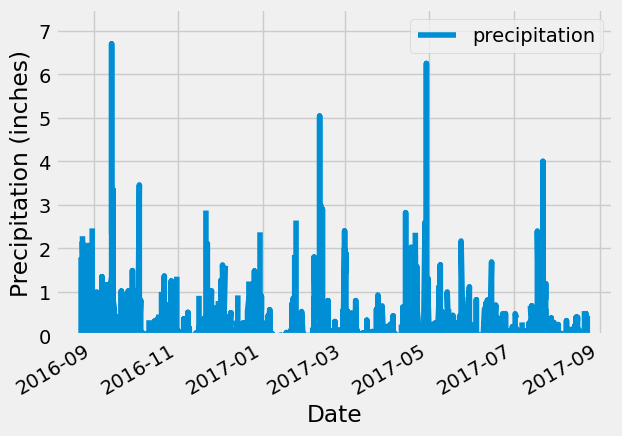

In [51]:
# Use Pandas Plotting with Matplotlib to plot the data
meas_df.plot();
plt.xlabel('Date');
plt.ylabel('Precipitation (inches)');
plt.legend(loc = 'upper right');
plt.ylim(0,7.5);

In [53]:
# Use Pandas to calculate the summary statistics for the precipitation data
meas_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [62]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(stat).count()
stations_count

9

In [72]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(meas.station,
                                 func.count(meas.id)).group_by(meas.station).order_by(func.count(meas.id).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = [meas.station, 
      func.min(meas.tobs),
      func.max(meas.tobs),
      func.avg(meas.tobs)]
most_active = session.query(*active_station).filter_by(station = "USC00519281").all()

print(f"The lowest temperature for USC00519281 is {most_active[0][1]}")
print(f"The highest temperature for USC00519281 is {most_active[0][2]}")
print(f"The average temperature for USC00519281 is {most_active[0][3]}")

The lowest temperature for USC00519281 is 54.0
The highest temperature for USC00519281 is 85.0
The average temperature for USC00519281 is 71.66378066378067


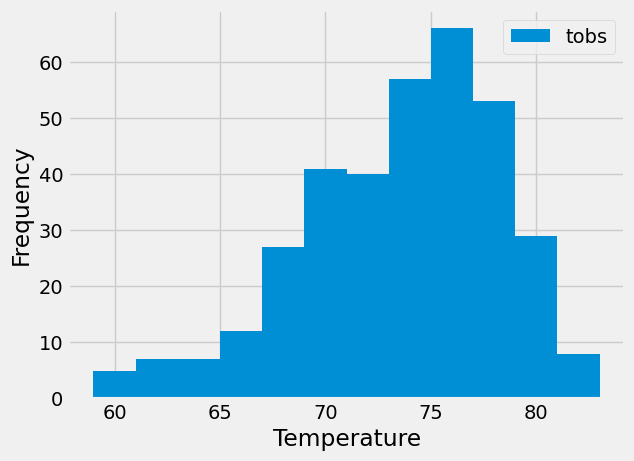

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12 = session.query(meas.date, meas.tobs).filter_by(station = "USC00519281").filter(meas.date >= old_date).all()
#convert to dataframe to plot data
last_12df = pd.DataFrame(last_12);
#plot
last12df.plot(kind = 'hist', bins = 12);
plt.xlabel('Temperature');
plt.ylabel('Frequency');

# Close Session

In [89]:
# Close Session
session.close()

{'session': <sqlalchemy.orm.session.Session at 0x190da27cac0>,
 '_propagate_attrs': immutabledict({'compile_state_plugin': 'orm', 'plugin_subject': <Mapper at 0x190ddf4eaf0; station>}),
 '_raw_columns': [Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)]}